In [7]:
#Original SQL Query: SELECT ROUND(MIN(Close), 2) AS Min_Close,
#       ROUND(MAX(Close), 2) AS Max_Close,
#       ROUND(AVG(Close), 2) AS Avg_Close,
#       ROUND(STDDEV(Close), 2) AS Std_Dev_Close
#FROM Tesla_Stock_Prices;

min_close = df['Close'].min()
max_close = df['Close'].max()
avg_close = df['Close'].mean()
std_dev_close = df['Close'].std()

print(f"Min Close: {min_close:.2f}")
print(f"Max Close: {max_close:.2f}")
print(f"Avg Close: {avg_close:.2f}")
print(f"Std Dev Close: {std_dev_close:.2f}")


Min Close: 3.16
Max Close: 1229.91
Avg Close: 138.76
Std Dev Close: 250.12


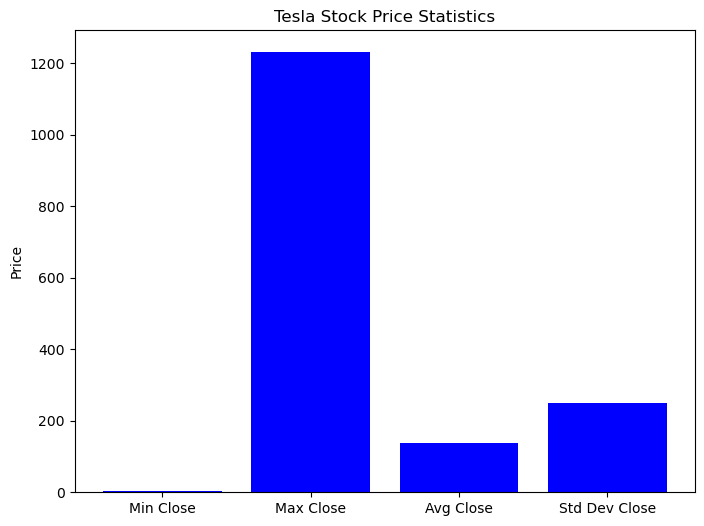

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('C:/Users/User/Documents/DataAnalyst/TESLA_Stock/TSLA_2010_2022.csv')

#Original SQL Query: SELECT ROUND(MIN(Close), 2) AS Min_Close,
#       ROUND(MAX(Close), 2) AS Max_Close,
#       ROUND(AVG(Close), 2) AS Avg_Close,
#       ROUND(STDDEV(Close), 2) AS Std_Dev_Close
#FROM Tesla_Stock_Prices;

# Calculate statistics
min_close = df['Close'].min()
max_close = df['Close'].max()
avg_close = df['Close'].mean()
std_dev_close = df['Close'].std()

# Create a bar plot
labels = ['Min Close', 'Max Close', 'Avg Close', 'Std Dev Close']
values = [min_close, max_close, avg_close, std_dev_close]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color='blue')
plt.title('Tesla Stock Price Statistics')
plt.ylabel('Price')
plt.show()
